In [1]:
%matplotlib inline
from scipy.integrate import odeint 
import numpy as np 
import matplotlib.pyplot as plt



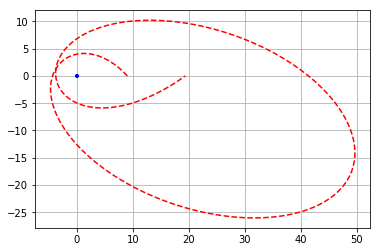

In [60]:
# 1) ecuación diferencial:
def dudphi(Y,t):
    u,v = Y
    new = e * m /(l**2)
    rel = 3.*m*u
    dYdt = [v,new - u + rel]
    return dYdt

# 2) rango 
vueltas = 1
phi = np.linspace(0. ,4.*vueltas*np.pi,100000)

# 3) constantes
e =1.
l = 1
m=0.1

# 4) Condiciones iniciales
u0 = 1./9.         
v0 = 0.1                  # para u' 
Y0 = [u0 ,v0]

# 5) La solución!
Y = odeint(dudphi,Y0,phi)


# Grafica
x = np.cos(phi)/Y[:,0]
y = np.sin(phi)/Y[:,0]
plt.plot(x,y,"r--")
plt.xlabel=('x (AU)')
plt.ylabel=('y (AU)')
plt.grid()
#plt.ylim(-600,800)


plt.plot(2*m* np.cos(phi),2*m* np.sin(phi),"b-")
plt.show()



[  0.00000000e+00   3.14162407e-04   6.28324814e-04 ...,   3.14152982e+01
   3.14156124e+01   3.14159265e+01]


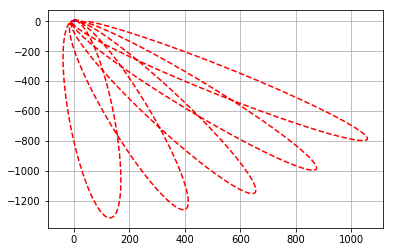

In [75]:
q=0

# 3) constantes
#q = 0.
e = 1.
l = 1.
m = 0.1
E = 0.

def A(u,q):
    return (1.-m*u)**(2.*q*(2.+q)) / ((1.-2.*m*u)**(q*(4.+q)))

def dAdu(u,q):
    return (2.*m*q*(2.+m*q*u)*((1.-m*u)**(2.*q*(2.+q)-1.))) / ((1.-2.*m*u)**(q*(4.+q)+1.))

def F(u,q):
    return ((E**2.)/(l**2.)) - (1.-2.*m*u)**(1.+q)*( (u**2.)*(1.-2.*m*u)**q + e/(l**2.))

def dFdu(u,q):
    return ((2*(1-2*m*u)**q)/(l**2))*(e*m*(1+q)+((l**2)*u*(1.-2.*m*u)**q)*(u*m*(3+2*q)-1.))
    
#print E    
# 1) ecuación diferencial:
def dudphi2(Y,t):
    u,v = Y
    a = A(u,q)*dFdu(u,q)
    b = dAdu(u,q)*F(u,q)
    dYdt = [v,0.5*(a+b)]
    return dYdt


# 2) rango 

phi2 = np.linspace(0.,10.*vueltas*np.pi,100000)
print phi2



# 4) Condiciones iniciales
#u0 = 1./9.         
#v0 = 0.1                  # para u' 
Y02 = [u0 ,v0]

# 5) La solución!
Y = odeint(dudphi2,Y02,phi2)


# Grafica
x = np.cos(phi2)/Y[:,0]
y = np.sin(phi2)/Y[:,0]
plt.plot(x,y,"r--")
plt.xlabel=('x (AU)')
plt.ylabel=('y (AU)')
plt.grid()
#plt.ylim(-600,800)


plt.plot(2*m* np.cos(phi2),2*m* np.sin(phi2),"b-")
plt.show()


In [46]:
print q
for i in range(0,6):
    #print i
    a= dudphi2([i,i],i) # q metrica
    b= dudphi([i,i],i)  # sch..ild
    print a, b
    #print a[0]-b[0],a[1]-b[1]

0.0
[0, 0.1] [0, 0.1]
[1, -0.6] [1, -0.6]
[2, -0.6999999999999998] [2, -1.2999999999999998]
[3, -0.1999999999999996] [3, -1.9999999999999998]
[4, 0.9000000000000007] [4, -2.6999999999999997]


ZeroDivisionError: float division by zero

In [51]:
a = np.linspace(0.1,100,1000)
for i in a:
    print dAdu(i,1)

0.431564359889
0.466535123271
0.505379455671
0.548642395764
0.596962192181
0.651089139466
0.711908824731
0.780470964753
0.858025369739
0.946067047119
1.04639310199
1.1611749645
1.29305067047
1.44524357267
1.62171615887
1.82737088395
2.06831450733
2.35220899973
2.68874160809
3.090260631
3.57264417943
4.15650035117
4.86884473838
5.74547466038
6.834375
8.20067515955
9.93397730252
12.1593753757
15.0543316435
18.8750488281
23.9985968178
30.9918527174
40.7273757989
54.5840380311
74.8061171125
105.170437488
152.279345352
228.190704907
356.074593147
583.2
1013.14607395
1893.50054092
3883.67011861
9000.62112483
24660.934375
86177.517627
442791.009821
4604033.2
268472773.434
inf
221566523.434
3135283.2
248732.367846
39912.8691895
9410.934375
2827.78161866
1003.54576566
401.953910065
176.446891912
83.2
41.5391354344
21.7261022832
11.8074000151
6.62518848439
3.8184627915
2.25115991831
1.35281202239
0.826227558657
0.511551267567
0.320361328125
0.202531945095
0.129024741457
0.0826921861115
0.0532353

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [41]:
for i in a:
    print dAdu(i,1)
dAdu(u,q)

-1.6

In [70]:
for i in a:
    print A(i,0)


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [72]:
for i in a:
    print dFdu(i,0),dudphi([i,0],0)[1]

0.006 0.03
-0.176 -0.04
-0.346 -0.11
-0.504 -0.18
-0.65 -0.25
-0.784 -0.32
-0.906 -0.39
-1.016 -0.46
-1.114 -0.53
-1.2 -0.6
-1.274 -0.67
-1.336 -0.74
-1.386 -0.81
-1.424 -0.88
-1.45 -0.95
-1.464 -1.02
-1.466 -1.09
-1.456 -1.16
-1.434 -1.23
-1.4 -1.3
-1.354 -1.37
-1.296 -1.44
-1.226 -1.51
-1.144 -1.58
-1.05 -1.65
-0.944 -1.72
-0.826 -1.79
-0.696 -1.86
-0.554 -1.93
-0.4 -2.0
-0.234 -2.07
-0.056 -2.14
0.134 -2.21
0.336 -2.28
0.55 -2.35
0.776 -2.42
1.014 -2.49
1.264 -2.56
1.526 -2.63
1.8 -2.7
2.086 -2.77
2.384 -2.84
2.694 -2.91
3.016 -2.98
3.35 -3.05
3.696 -3.12
4.054 -3.19
4.424 -3.26
4.806 -3.33
5.2 -3.4
5.606 -3.47
6.024 -3.54
6.454 -3.61
6.896 -3.68
7.35 -3.75
7.816 -3.82
8.294 -3.89
8.784 -3.96
9.286 -4.03
9.8 -4.1
10.326 -4.17
10.864 -4.24
11.414 -4.31
11.976 -4.38
12.55 -4.45
13.136 -4.52
13.734 -4.59
14.344 -4.66
14.966 -4.73
15.6 -4.8
16.246 -4.87
16.904 -4.94
17.574 -5.01
18.256 -5.08
18.95 -5.15
19.656 -5.22
20.374 -5.29
21.104 -5.36
21.846 -5.43
22.6 -5.5
23.366 -5.57
24.144 -5

5531.974 -68.29
5543.504 -68.36
5555.046 -68.43
5566.6 -68.5
5578.166 -68.57
5589.744 -68.64
5601.334 -68.71
5612.936 -68.78
5624.55 -68.85
5636.176 -68.92
5647.814 -68.99
5659.464 -69.06
5671.126 -69.13
5682.8 -69.2
5694.486 -69.27
5706.184 -69.34
5717.894 -69.41
5729.616 -69.48
5741.35 -69.55
5753.096 -69.62
5764.854 -69.69
5776.624 -69.76
5788.406 -69.83
5800.2 -69.9
